In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Загружаем данные

In [31]:
data = datasets.fetch_california_housing(as_frame = True)

In [32]:
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
X = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]
y = df['MedHouseVal']
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [34]:
X.isna().sum() #ищем пропуски

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

# Строим модель линейной регрессии

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 



In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
preds = model.predict(X_test)

In [39]:
score_reg = model.score(X_test, y_test)

In [40]:
score_reg

0.613371245487671

# Строим регрессор на основании дерева решений с параметрами по умолчанию

In [52]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor (max_depth = 2)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2)

In [53]:
tree_reg.score(X_test, y_test)

0.452035886692603

# Визуализируем
Для визуализации мне понадобилась установить несколько доп пакетов

In [48]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install graphviz

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [25]:
conda install graphviz

Solving environment: | ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [17]:
conda install conda=23.7.0


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | ^C
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [54]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



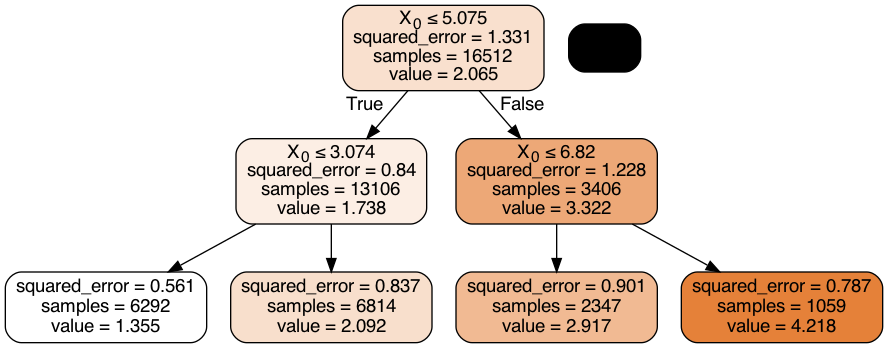

In [55]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Оптимизируем глубину

In [57]:
max_score, max_n = 0, 0
for n in range(1,15):
  tree_reg = DecisionTreeRegressor(max_depth=n, random_state=7).fit(X_train, y_train) 
  score_ = tree_reg.score(X_test, y_test)
  if score_ > max_score:
    max_score = score_
    max_n = n
print(f'depth = {max_n}, score = {max_score}')

depth = 10, score = 0.679811648813611


# Оптимизируем еще один параметр

In [62]:
max_score, max_i = 0, 0
for i in range (1, 15):
    tree_reg = DecisionTreeRegressor(min_samples_leaf = i, max_depth=10, random_state=7).fit(X_train, y_train)
    score_ = tree_reg.score(X_test, y_test)
    if score_ > max_score:
      max_score = score_
      max_i = i
print(f'min_samples_leaf = {max_i},score = { max_score}')

min_samples_leaf = 14,score = 0.7143169973797044


# Выводы

Точность модели значительно выросла при использовании регрессора на основе дерева решений и оптимизации его параметров. Можно сделать вывод, что в данном конкретном датасете слабая линейная зависимость между целевой переменной и другими признаками, поэтому тут предпочтительнее использовать дерево решений